  # Hashin-Shtrikman upper and lower bound curves

   ## Function computes velocities and elastic moduli for the Hashin-Shtrikman  upper and lower bound curves.
 ## Without input arguments, plots default elastic moduli bounds vs porosity
 ## Function returns a list of outputs:
 ###     [KU,KL,GU,GL,POR,VPU,VPL,VSU,VSL,RHO]
 ###    KU,KL, GU,GL:       Upper and lower bounds on bulk and shear moduli
 ###    POR:                Volume fraction of material 2
 ###    VPU,VPL, VSU,VSL:   Upper and lower bounds on velocities
 ###   RHO:                Bulk density
  

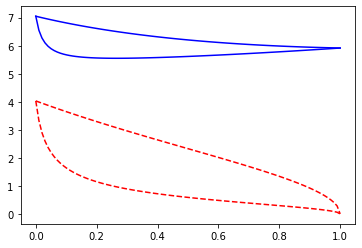

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def Hash(k1=76,mu1=44,k2=98,mu2=0,ro1=2.71,ro2=2.8):
   
    por=np.linspace(0,1,100); por[0]=1e-7;
    
    
    ku=k2+(1.-por)*(k1-k2)*(k2+4.*mu1/3.)/(k2+4.*(mu1/3.)+por*(k1-k2));
    kl=k2+(1.-por)*(k1-k2)*(k2+4.*mu2/3.)/(k2+4.*(mu2/3.)+por*(k1-k2));
    fgu=mu1*(9.*k1+8.*mu1)/(6.*(k1+2.*mu1));
    fgl=mu2*(9.*k2+8.*mu2)/(6.*(k2+2.*mu2));
    gu=mu2+(mu1-mu2)*(1.-por)*(mu2+fgu)/(mu2+fgu+por*(mu1-mu2));
    gl=mu2+(mu1-mu2)*(1.-por)*(mu2+fgl)/(mu2+fgl+por*(mu1-mu2));
    
    #por=[0,por]; ku=[k1,ku]; kl=[k1,kl]; gu=[mu1,gu]; gl=[mu1,gu];
    #plt.plot(por,ku,'-g',por,kl,'-g',por,gu,'--c',por,gl,'--c')
    outlist = [ku,kl,gu,gl,por]
    
    gl=mu1*(1.-por)/(1.+por*mu1);
    ro=(1.-por)*ro1+por*ro2;
    vpu=np.sqrt((ku+(4.*gu/3.))/ro); outlist.append(vpu)
    vpl=np.sqrt((kl+(4.*gl/3.))/ro); outlist.append(vpl)
    vsu=np.sqrt(gu/ro);              outlist.append(vsu)
    vsl=np.sqrt(gl/ro);              outlist.append(vsl); outlist.append(ro)
    
    return outlist
   
Hash()


outlist=Hash()

por=outlist[4]; Vpu=outlist[5]; Vpl=outlist[6]; Vsu=outlist[7]; Vsl=outlist[8]; Rho=outlist[9]; 

plt.plot(por,Vpu,'-b',por,Vpl,'-b',por,Vsu,'--r',por,Vsl,'--r')
  
